In [36]:

import clawpack.pyclaw as pyclaw 
import os, fnmatch
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from clawpack.pyclaw.solution import Solution
from clawpack.pyclaw import solution
import matplotlib.colors as mcolors
    
# Finding the home directory
from os.path import expanduser
home = expanduser("~")
cwd = os.getcwd()

user_directory = cwd

dirName = '_output'  #directory in which the results lie
dirAddress = user_directory+"/"+dirName

print("Here are the output files: "+dirAddress)
files=fnmatch.filter(os.listdir(dirAddress), 'fort.q*' )
NbSim = len(files)
print("number of files: "+str(NbSim))

Here are the output files: /home/ancey/dossier_Clawpack/flume_Dambreak_Friction/_output
number of files: 51


# Particular solution 

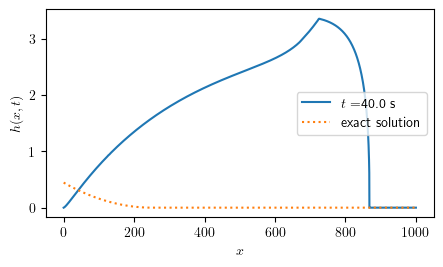

In [26]:
# Plot solution h(x, t)

frameNo = 40
framesoln = solution.Solution(frameNo,  path=dirAddress,file_format='ascii')

x=framesoln.state.grid.x.centers
h=framesoln.state.q[0]
g = 9.81 ; h0 = 1 ; c0 = np.sqrt(g*h0) ; tt = framesoln.t
htrue=(2*c0-x/tt)**2/9/g*np.where((x < 2*c0*tt) & (-c0*tt<x), 1, 0)+np.where( x < -c0*tt  , 1,0)
 
plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(5, 2.7))
 
ax.plot(x, h,  label=r'$ t = $'+str(framesoln.t)+" s")
ax.plot(x, htrue, ':',label='exact solution')
ax.legend(loc='right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x, t)$');

Text(0, 0.5, '$u(x, t)$')

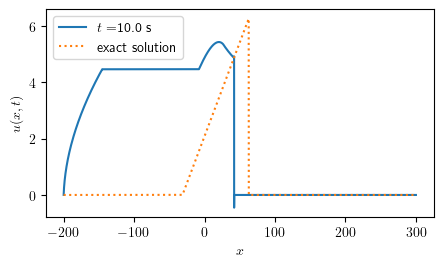

In [3]:
 # Plot solution u(x, t)

hu = framesoln.state.q[1]
dim = np.size(hu)
u=np.empty(dim)
for i in range(dim):
    if h[i]>0:
        u[i] = hu[i]/h[i]
    else:
        u[i] = 0.

utrue= 2/3*(c0+x/tt) * np.where((x < 2*c0*tt) & (-c0*tt<x), 1, 0)
 
plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(5, 2.7))
 
ax.plot(x, u,  label=r'$ t = $'+str(framesoln.t)+" s")
ax.plot(x, utrue, ':',label='exact solution')
ax.legend(loc='upper left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t)$')

In [4]:
# Front position
print('h = 0 for x = '+str(min(x[ h<1e-6 ]) ))
print('u = 0 for x = '+str(min(x[ (u<1e-6) & (x>0) ]) ))
print('Ritter x_f =  {:2.2f}'.format(2*c0*tt))


h = 0 for x = 42.01250000000002
u = 0 for x = 41.98750000000001
Ritter x_f =  62.64


# Animation

In [27]:
# Animation for depth 
def dambreak_animation():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)
    s    = sol.state.aux[0]

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]+s

    hmin = -1
    hmax = 3
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure()
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$h(x, t)$',fontsize=14)
    axes.set_xlim((x[0], x[-1]))
    #axes.set_ylim(( hmin, hmax))
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*hmax , '')
 
    def init():
        computed_line, = axes.plot(xsol[0][0], hsol[0][0], 'r')
        #exact_line, = axes.plot(x_true[0], 0 , 'k--')
        exact_line, = axes.plot(xsol[0], s , 'brown')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
 
    def fplot(n):
        tt = tps[n]
        if tt>0:
            htrue=(2*c0-x_true/tt)**2/9/g  \
             *np.where((x_true < 2*c0*tt) & (-c0*tt<x_true), 1, 0)+np.where(x_true < -c0*tt  , 1,0)
        else:
            htrue= np.where(x_true < 0 , 1,0)
        computed_line.set_data(xsol[n] ,  hsol[n] )
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim = dambreak_animation( )
HTML(anim.to_jshtml()) 

2024-02-10 10:42:57,506 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [23]:
# Animation for velocity 
def dambreak_animation_velocity():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    qsol = np.empty((NbSim, sol.state.q.shape[1]))
    usol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]
        qsol[i] = sol.state.q[1]
        usol[i] = np.where(hsol[i]>0.,1/(1e-10+hsol[i]),0.)*qsol[i]


    umin = 0.0
    umax = 6
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure()
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$u(x, t)$',fontsize=14)
    axes.set_xlim((x[0], x[-1]))
    axes.set_ylim(( umin, umax))
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*umax , '')
 
    def init():
        computed_line, = axes.plot(xsol[0][0], usol[0][0], 'r')
        exact_line, = axes.plot(x_true[0], 0 , 'k--')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
    
    def fplot(n):
        tt = tps[n]
        if tt>0:
            utrue=( c0+x_true/tt)*2/3 * np.where((x_true < 2*c0*tt) & (-c0*tt<x_true), 1, 0) 
        else:
            utrue= 0
        computed_line.set_data([xsol[n],], [usol[n][:]])
        exact_line.set_data([x_true], [utrue])
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim_u = dambreak_animation_velocity( )
HTML(anim_u.to_jshtml())

2024-02-10 10:37:30,571 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


# Front position

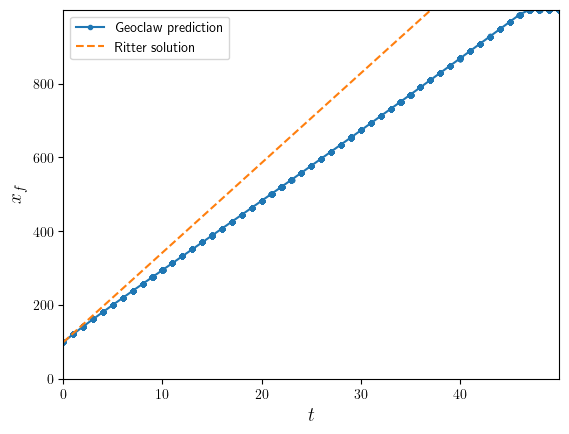

In [31]:
# Front position with time

with open(dirAddress+ '/front.txt') as f:
    ts = []
    xf = []
    for line in f:
        line = line.split()
        ts.append(float(line[0]))
        xf.append(float(line[1]))
g     = 9.81        
xf_th =100+ 2*np.sqrt(g*15)*np.array(ts) 

def FrontSearch():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    xfro = np.empty( NbSim  )
    tps  = np.empty(NbSim)

    for i in range(0,40):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]
        xfro[i] = min(xsol[i, hsol[i]<1e-6 ])
    return xfro, tps, xsol, hsol

xfront, times, xs, hs = FrontSearch()

fig = plt.figure()
axes = plt.subplot(1, 1, 1)
plt.rcParams['text.usetex'] = True
axes.set_xlabel(r'$t$',fontsize=14)
axes.set_ylabel(r'$x_f$',fontsize=14)
axes.set_xlim((0,max(ts)))
axes.set_ylim((0,max(xf)))


axes.plot(ts , xf , '.-', label='Geoclaw prediction')
axes.plot(ts , xf_th , '--', label='Ritter solution')
axes.legend(loc='upper left')
plt.savefig("frontPositionGeoClaw_vs_Ritter.pdf");

## mp4

In [32]:
# Export mp4
anim.save('DamBreak_SlopingBed.mp4',fps=5,writer="ffmpeg",dpi=300)



2024-02-10 10:47:48,253 INFO CLAW: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-02-10 10:47:48,254 INFO CLAW: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -framerate 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y DamBreak_SlopingBed.mp4


## png

In [37]:
# Alternative to export snapshots
def ExportAnimation():
    figs = []
 
    sol   = solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol  = np.empty((NbSim, sol.state.q.shape[1]))
    hsol  = np.empty((NbSim, sol.state.q.shape[1]))
    tps   = np.empty(NbSim)
    s     = sol.state.aux[0]

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]+s

    hmin = 0.0
    hmax = 1.1
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    xmoy = (L+x0)/2

 
    for i in range(0,NbSim):
        fig  = plt.figure()
        axes = plt.subplot(1, 1, 1)
        plt.rcParams['text.usetex'] = True
        axes.set_xlabel(r'$x$',fontsize=14)
        axes.set_ylabel(r'$h(x, t)$',fontsize=14)
        axes.set_xlim((x0,L))
        #axes.set_ylim(( hmin, hmax))
        text = axes.text(100, -20 , '')
        tt   = tps[i]
        val  = f'{tt:.1f}'
        text.set_text(r'$ t = {} $ s'.format(val))
        axes.set_title(" ")
        
         
        axes.fill_between(xsol[i] , hsol[i], s, color='lightskyblue')
        axes.plot(xsol[0],  s, color='brown')
        figs.append(fig)
        plt.close(fig)
    return figs

from clawpack.visclaw import animation_tools
figures = ExportAnimation()
animation_tools.interact_animate_figs(figures)

interactive(children=(IntSlider(value=0, description='frameno', max=50), Output()), _dom_classes=('widget-inte…

In [ ]:
# export figures for latex
if not os.path.isdir('DambreakFrictionSnapshots'): os.mkdir(user_directory+"/DambreakFrictionSnapshots")
for i in range(len(figures)):
    figures[i].savefig(user_directory+'/DambreakFrictionSnapshots/Frame'+str(i)+'.png', bbox_inches='tight',dpi=300)